In [2]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from NN import Network, Activation_layer, Dense_layer
from loss_functions import mean_squared_error, mean_squared_error_derivative, binary_cross_entropy, binary_cross_entropy_derivative, categorical_cross_entropy, categorical_cross_entropy_derivative
from activation_functions import sigmoid, sigmoid_derivative, relu, relu_derivative, leaky_relu, leaky_relu_derivative, tanh, tanh_derivative, softmax, softmax_derivative
from others import check_performance

Data I'll be working on comes from here:
https://archive.ics.uci.edu/dataset/53/iris

In [3]:
columns = ['sepal length', 'sepal width', 'petal length', 'petal width','class']
data = pd.read_csv("iris.data", names = columns)

In [4]:
data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
mapping = {'Iris-setosa' : np.array([1, 0, 0]),
           'Iris-versicolor' : np.array([0, 1, 0]),
           'Iris-virginica': np.array([0, 0, 1])}
class_one_hot = []
for i in data['class']:
  class_one_hot.append(mapping[i])
data['class_one_hot'] = class_one_hot

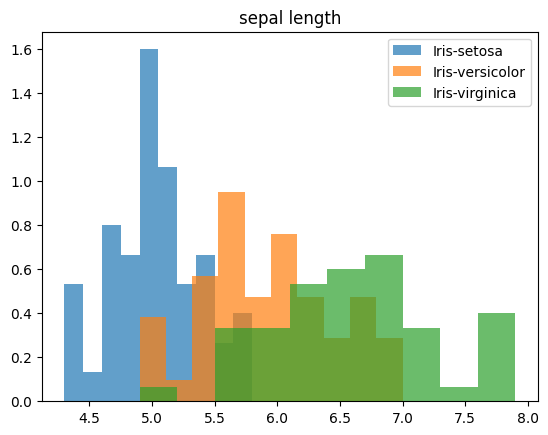

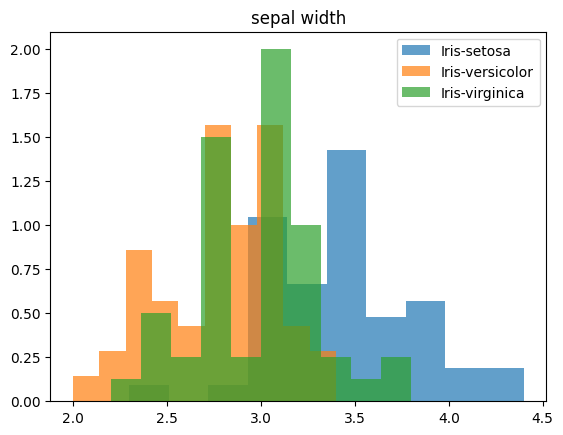

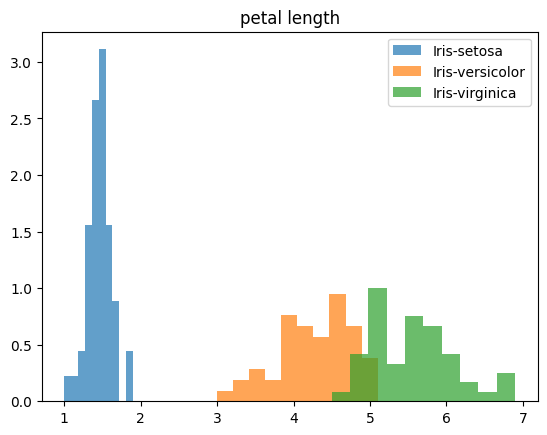

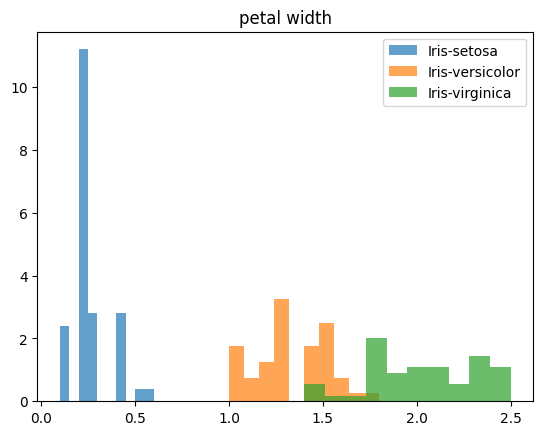

In [6]:
for column in columns[:-1]:
  plt.figure()
  plt.hist(data[data['class'] == 'Iris-setosa'][column], label = 'Iris-setosa', alpha = 0.7, density = True)
  plt.hist(data[data["class"] == 'Iris-versicolor'][column], label = 'Iris-versicolor', alpha = 0.7, density = True)
  plt.hist(data[data["class"] == 'Iris-virginica'][column], label = 'Iris-virginica', alpha = 0.7, density = True)
  plt.title(column)
  plt.legend()
  plt.show()


In [7]:
data = data.sample(frac=1, random_state=1)

In [19]:
train,  test = np.split(data.sample(frac=1), [int(len(data) * 0.7)])

In [9]:
def oversample(data):
  classes = data['class'].unique()
  sub_datas = []
  class_counts = data['class'].value_counts()
  target = max(class_counts)
  for class_ in classes:
    sub_data = data[data['class'] == class_]
    data = pd.concat([data,sub_data.sample(n=(target - class_counts[class_]), random_state=1)])
  return data

In [20]:
train = oversample(train)

In [21]:
train = train.drop(['class'], axis=1)
test = test.drop(['class'], axis=1)

In [12]:
def cut(data):
  x = data.iloc[:, :-1].values
  x = [np.array([i]) for i in x]

  y = data.iloc[:, -1].values

  return x, y


In [22]:
x_train, y_train = cut(train)
x_test, y_test = cut(test)


In [16]:
network = Network()
network.choose_loss_func(mean_squared_error, mean_squared_error_derivative)
network.add_layer(Dense_layer(4, 20))
network.add_layer(Activation_layer(tanh, tanh_derivative))
network.add_layer(Dense_layer(20, 20))
network.add_layer(Activation_layer(tanh, tanh_derivative))
network.add_layer(Dense_layer(20, 3))
network.add_layer(Activation_layer(sigmoid, sigmoid_derivative))

In [23]:
network.fit(x_train, y_train, 500, 0.1, printing=False)

0.6690354571672178

In [26]:
print(network.predict(x_test[0]))
y_test[0]

[[9.94202523e-01 6.74204788e-03 2.45994849e-04]]


array([1, 0, 0])

In [24]:
error = 0
for i, test in enumerate(x_test):
  error += mean_squared_error(network.predict(test), y_test[i])
error / len(x_test)

0.00916116114884442